In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Task1: Merge The 12 Months of sales Data into a single Data Frame

In [2]:
files = os.listdir("./Sales_Data/")
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [3]:
df = pd.read_csv('Sales_Data\\Sales_April_2019.csv')

In [4]:
path = 'Sales_Data\\'

for i in files[1:]:
    dff = pd.read_csv(path + i) 
    df = pd.concat([df,dff], axis=0)

df.reset_index(drop=True, inplace=True)

In [5]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


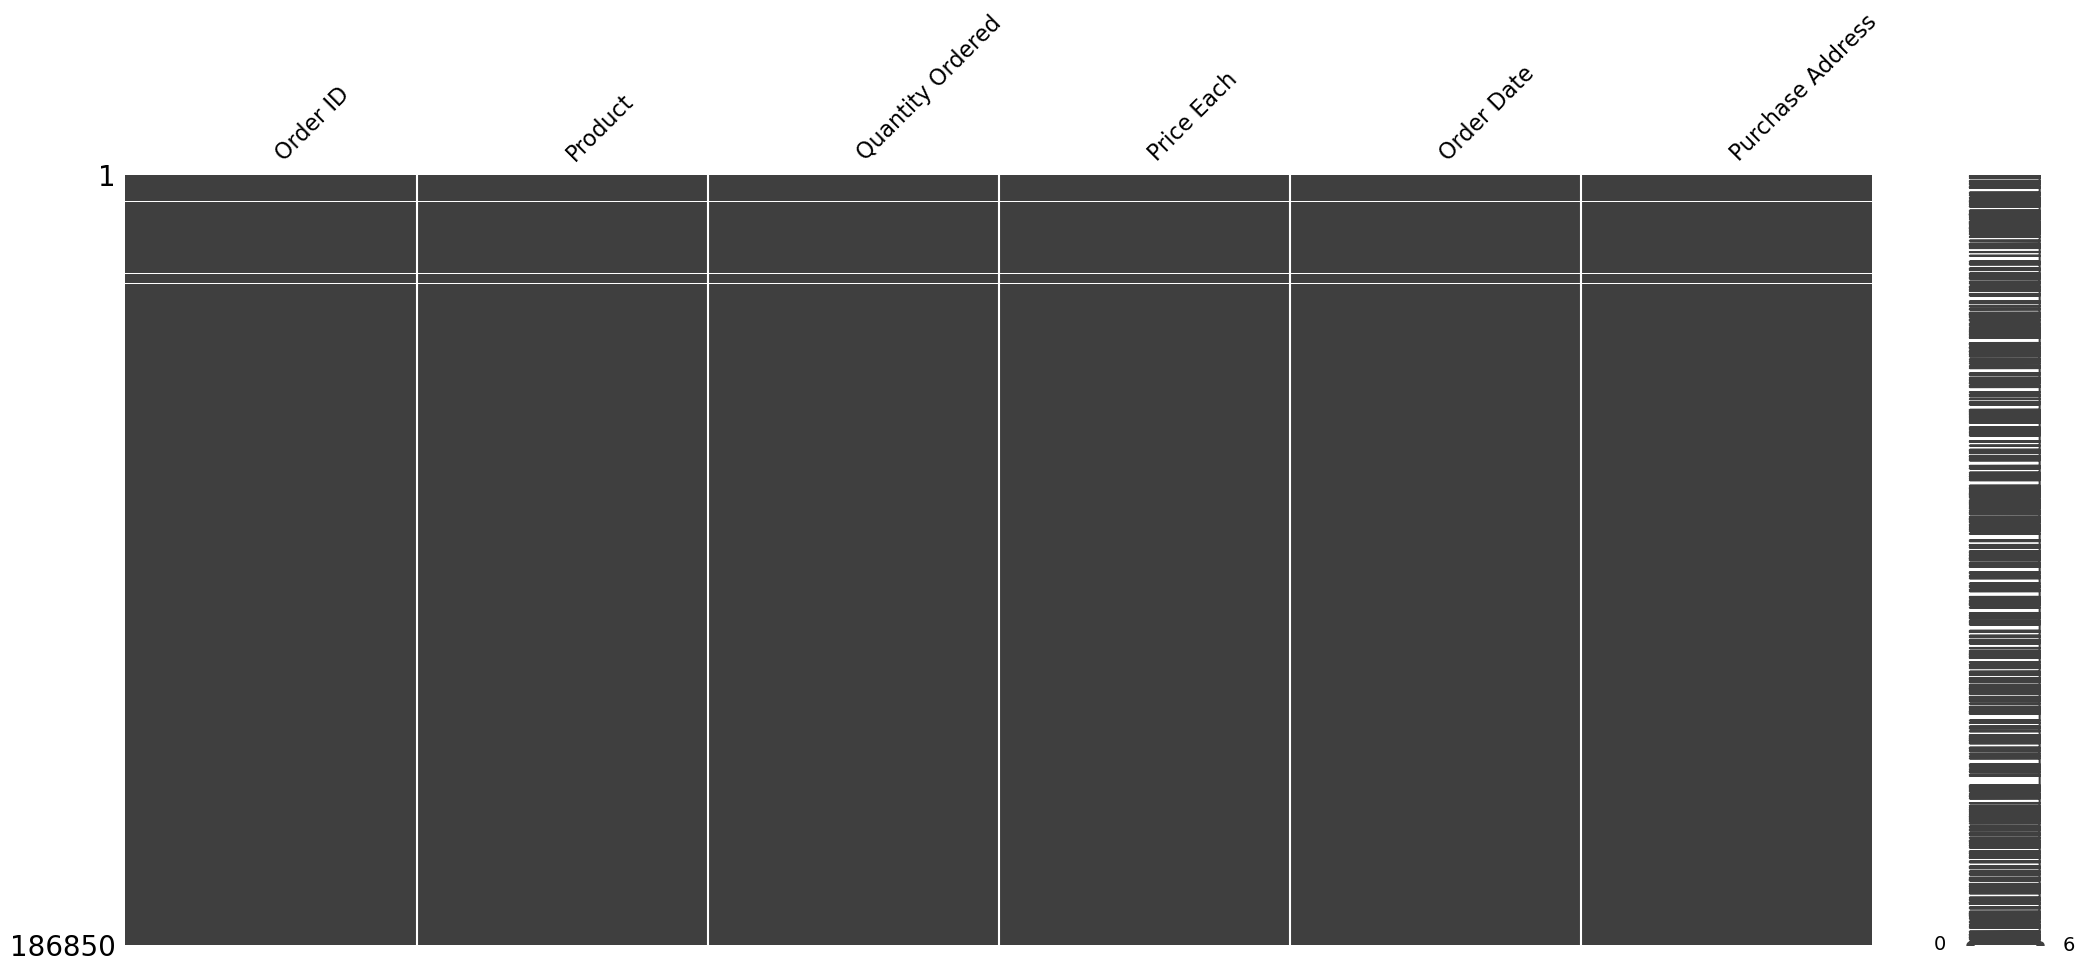

<Figure size 100x200 with 0 Axes>

In [7]:
import missingno as msno
msno.matrix(df)
plt.figure(figsize=(1, 2))
plt.show()

In [8]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [9]:
df.dropna(inplace=True)

### Task 2: What was the best Month For Sales? How much was earned in that Month

In [10]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [11]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

In [12]:
df.dropna(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  object        
 3   Price Each        185950 non-null  object        
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 9.9+ MB


In [14]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype("int64")
df['Price Each'] = df['Price Each'].astype("float64")

In [15]:
df['Year'] = df['Order Date'].dt.year

In [16]:
df['Month'] = df['Order Date'].dt.month

In [17]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

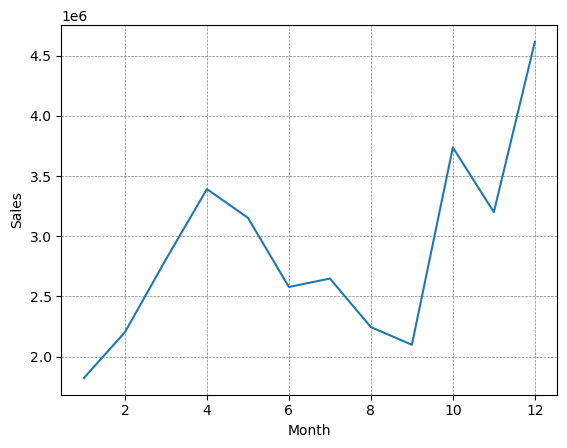

In [18]:
best_sales_Month = pd.DataFrame(df.groupby('Month').sum()['Sales'].sort_values(ascending=False)).reset_index()
sns.lineplot(data=best_sales_Month, x='Month', y='Sales')
plt.style.use('dark_background')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

### Task 3: What is the city Has Highest Number of Sales? 

In [19]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,11.99


In [20]:
def get_city (x):
    return ((x.split(','))[1]).strip()+ " " + (x.split(',')[2][0:3]).strip()

df['City'] = df['Purchase Address'].apply(lambda x: get_city(x) )


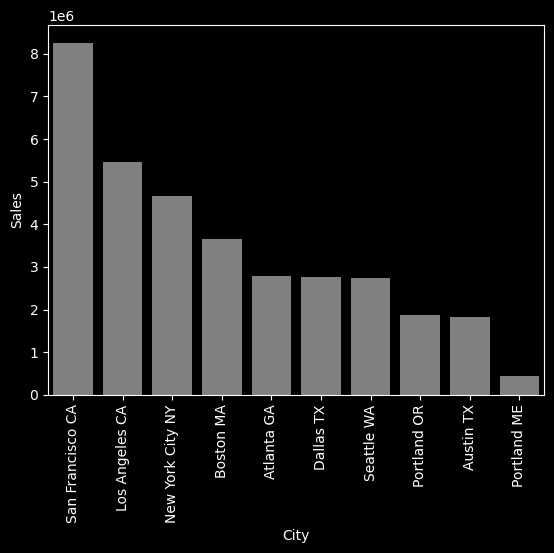

In [21]:
best_Sales_City=pd.DataFrame(df.groupby('City')['Sales'].sum().sort_values(ascending=False)).reset_index()
sns.barplot(data=best_Sales_City, x='City', y='Sales', color='gray')
plt.xticks(rotation=90)
plt.style.use('dark_background')
plt.show()

### Task 4: What Time should we display advertisement to Maximize of customer's buying product? 

In [22]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,11.99,Los Angeles CA


In [23]:
df['Hours'] = df['Order Date'].dt.hour

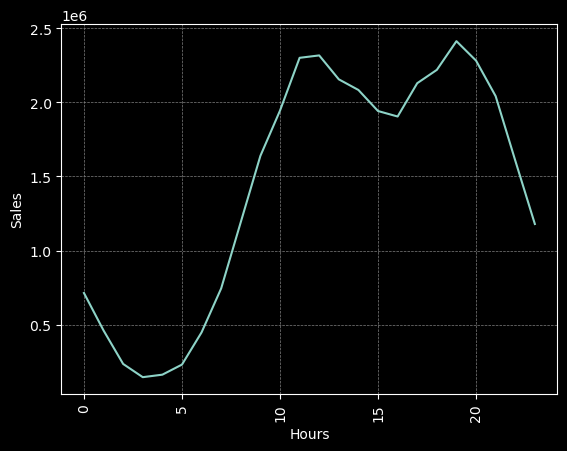

In [24]:
best_time_advertisement=pd.DataFrame(df.groupby('Hours')['Sales'].sum().sort_values(ascending=False)).reset_index()
sns.lineplot(data=best_time_advertisement, x='Hours', y='Sales')
plt.xticks(rotation=90)
plt.style.use('dark_background')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

### Task 5: What Products are most often sold Together?

In [25]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Sales,City,Hours
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,11.99,Los Angeles CA,9


In [26]:
new_df = df.groupby('Order ID')['Product'].agg(list).reset_index()

In [27]:
new_df = new_df[new_df["Product"].apply(lambda x: len(x) > 1)]['Product'].value_counts().reset_index()
new_df.rename(columns={'index':'Products','Product':'Count'}, inplace=True)

In [28]:
new_df['Products'] = new_df['Products'].apply(lambda x: ', '.join(x))

In [29]:
new_df

,Products,Count
0,"iPhone, Lightning Charging Cable",882
1,"Google Phone, USB-C Charging Cable",856
2,"iPhone, Wired Headphones",361
3,"Vareebadd Phone, USB-C Charging Cable",312
4,"Google Phone, Wired Headphones",303
...,...,...
361,"Google Phone, USB-C Charging Cable, USB-C Char...",1
362,"ThinkPad Laptop, 27in 4K Gaming Monitor",1
363,"iPhone, Google Phone",1
364,"Vareebadd Phone, 27in FHD Monitor",1


In [30]:
new_df = new_df[new_df['Count'].isin(list(new_df['Count'].nlargest(20)))]

In [31]:
new_df

,Products,Count
0,"iPhone, Lightning Charging Cable",882
1,"Google Phone, USB-C Charging Cable",856
2,"iPhone, Wired Headphones",361
3,"Vareebadd Phone, USB-C Charging Cable",312
4,"Google Phone, Wired Headphones",303
5,"iPhone, Apple Airpods Headphones",286
6,"Google Phone, Bose SoundSport Headphones",161
7,"Vareebadd Phone, Wired Headphones",104
8,"Google Phone, USB-C Charging Cable, Wired Head...",77
9,"Vareebadd Phone, Bose SoundSport Headphones",60


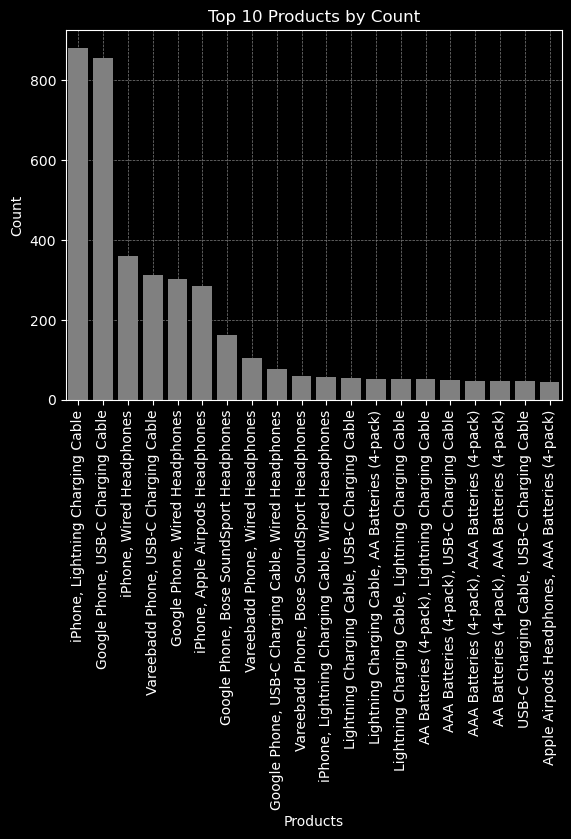

In [32]:
sns.barplot(data=new_df, x='Products', y='Count', color='gray')
plt.style.use('dark_background')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.xticks(rotation=90)
plt.title(f'Top {10} Products by Count')
plt.xlabel('Products')
plt.ylabel('Count')
plt.show()


### What product sold the most? Why do you think it sold the most?

In [33]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Sales,City,Hours
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2019,4,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",2019,4,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",2019,4,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",2019,4,11.99,Los Angeles CA,9


In [34]:
best_product = df[df['Quantity Ordered'] > 1]

In [35]:
data_best_product=best_product.groupby('Product')[['Quantity Ordered','Sales']].sum().sort_values(by='Quantity Ordered',ascending=False).reset_index()

In [36]:
data_best_product['Sales'] = data_best_product['Sales'] / data_best_product['Quantity Ordered']

In [37]:
data_best_product

,Product,Quantity Ordered,Sales
0,AAA Batteries (4-pack),17291,2.99
1,AA Batteries (4-pack),12302,3.84
2,USB-C Charging Cable,3956,11.95
3,Wired Headphones,3196,11.99
4,Lightning Charging Cable,3007,14.95
5,Bose SoundSport Headphones,262,99.99
6,Apple Airpods Headphones,223,150.00
7,27in FHD Monitor,86,149.99
8,20in Monitor,56,109.99
9,Flatscreen TV,38,300.00


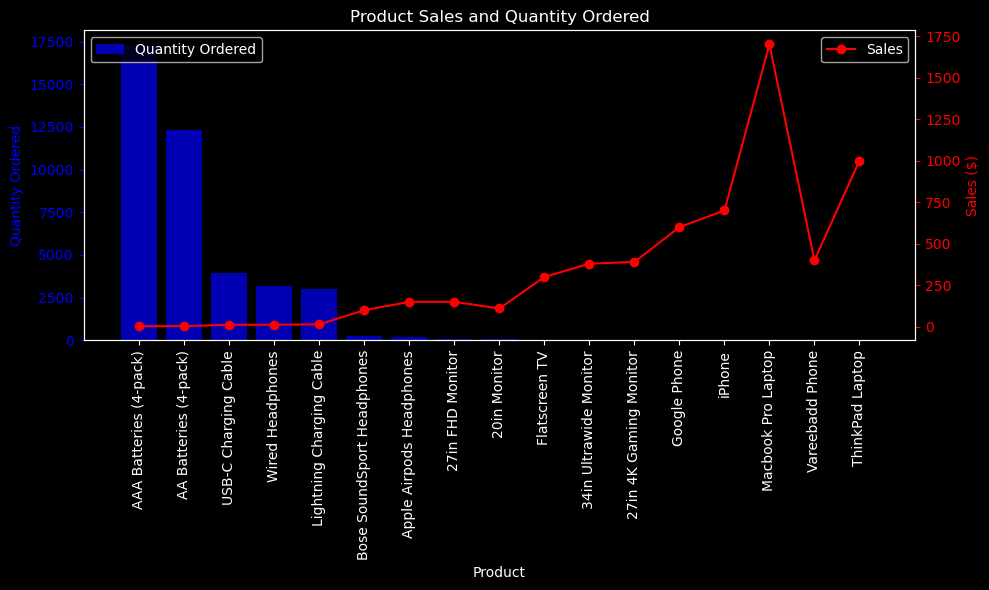

In [38]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(data_best_product['Product'], data_best_product['Quantity Ordered'], color='b', alpha=0.7, label='Quantity Ordered')
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='b')
ax1.tick_params('y', colors='b')
plt.xticks(rotation=90)

ax2 = ax1.twinx()

ax2.plot(data_best_product['Product'], data_best_product['Sales'], color='r', marker='o', label='Sales')
ax2.set_ylabel('Sales ($)', color='r')
ax2.tick_params('y', colors='r')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=90)

plt.title('Product Sales and Quantity Ordered')
plt.tight_layout()

plt.show()